In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os
import seaborn
import numpy as np

In [2]:
data_dir = './random_trials/static'
static_data = []
for f in os.listdir(data_dir):
    static_data.append(pd.read_csv(os.path.join(data_dir,f)))
    print('Loaded data log:'+f)

data_dir = './random_trials/rotational'
head_data = []
for f in os.listdir(data_dir):
    head_data.append(pd.read_csv(os.path.join(data_dir,f)))
    print('Loaded data log:'+f)
    
data_dir = './random_trials/collisions/rotational'
hcoll_data = []
for f in os.listdir(data_dir):
    hcoll_data.append(pd.read_csv(os.path.join(data_dir,f)))
    print('Loaded data log:'+f)
data_dir = './random_trials/collisions/static'
scoll_data = []
for f in os.listdir(data_dir):
    scoll_data.append(pd.read_csv(os.path.join(data_dir,f)))
    print('Loaded data log:'+f)

Loaded data log:rc_output_no_head.csv
Loaded data log:rc_output_w_head.csv
Loaded data log:rc_output_Head_1.csv
Loaded data log:rc_output_Head_2.csv
Loaded data log:rc_output_w_Rotation.csv
Loaded data log:.DS_Store
Loaded data log:rc_output_collision_nohead.csv


In [3]:
hd = head_data[0]
sd = static_data[0]
scoll = scoll_data[0]
hcoll = hcoll_data[0]
print(hd.shape,sd.shape)
for i in range(len(static_data)-1):
    sd = pd.concat([sd,static_data[i+1]])
for i in range(len(head_data)-1):
    hd = pd.concat([hd,head_data[i+1]])
print(hd.shape,sd.shape)

(1000, 7) (1000, 7)
(1600, 7) (1000, 7)


In [4]:
hd[hd['Timeout']==True].describe()


,Distance Travelled,Radial Distance,Turned Head,Blocks,Radius
count,117.000000,117.000000,117.000000,117.000000,117.000000
mean,8.121927,6.122305,188.452991,141.658120,8.128205
std,5.733895,4.195030,84.858045,70.281842,2.191435
min,1.880757,1.536110,0.000000,32.000000,4.000000
25%,4.310895,3.472298,213.000000,72.000000,6.000000
50%,5.854900,4.244643,227.000000,128.000000,8.000000
75%,9.728071,7.576232,234.000000,200.000000,10.000000
max,31.635224,16.046121,247.000000,242.000000,11.000000


In [5]:
hd.reset_index()
hd.loc[3]

,Distance Travelled,Radial Distance,Deadend,Turned Head,Blocks,Radius,Timeout
3,2.616054,2.527864,True,8,32,4,False
3,13.880760,11.888395,False,1,128,8,False
3,2.789320,2.585864,True,6,162,9,False


A total of 2000 virtual trials are run to evaluate the performance of a static head component and a rotational head component. In order to test the obstacle avoidance algorithm is as many different scenerios as possible, each trial was run in a randomly generated labyrinth of changing size. The overall obstacle density was kept constant which means that the number of obstacles scalled quadratically with the size of the labyrinth. In consequence, the number of deadends in the larger labyrinths increased. Trials in which the robot is able to escape the labyrinth are considered a success. If it hits a deadend, the robot did not collide with anything but also cannot find a way out of the labyrinth. A time out occurs when the robot does not get stuck in a deadend but takes too long to escape the labyrinth. The successrate is the main metric in the comparision of the rotatinal to the static head design. Comparing the successrate of all trials, the rotational head design performs slightly better with escaping 48% of all trials. The static head version 42% of all trials. Noticeable is that this performance difference increases in larger Labyrinths. The rotational head design performce more than twice as well as the static head design for labyrithn radii above 10 simulation unit lenghts. The pie chart shows that the rotational head design takes the big majority of all escapes at the large scale labyrinth simulation for high obstacle density. 

In [6]:
series =[]
index = []
for i,df in enumerate([hd,sd]):
    blocks = df['Blocks'][1]
    radius = df['Radius'][1]
#     df = df[df['Radius'] <= 7]
    print(len(df))
#     df = df[df['Radius'] > 3]
    f = len(df[df['Deadend']==True])
    s = len(df[df['Deadend']==False])
    tot = s+f
    t_frac = round(len(df[df['Timeout']==True])/tot,3)
    s_frac = round(s/tot,3)
    f_frac = round(f/tot,3)
    series.append([s_frac-t_frac,f_frac,t_frac])
    if df['Turned Head'].mean() > 1:
        index.append('Turning Head '.format(radius,blocks))
    else:
        index.append('Static Head'.format(radius,blocks))

1600
1000


               Escaped  Hit Deadend  Timed Out
Turning Head     0.456        0.471      0.073
Static Head      0.421        0.571      0.008


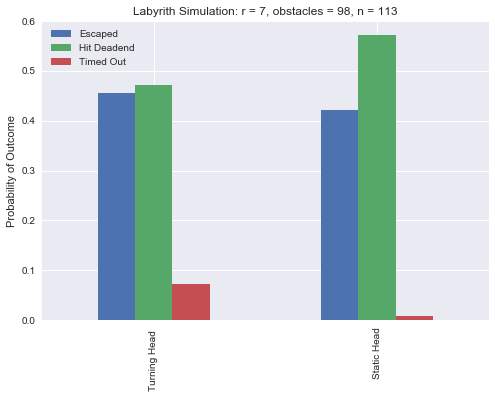

In [7]:
data = pd.DataFrame(series,columns=['Escaped','Hit Deadend','Timed Out'],index = index)
print(data.head())

plt.figure()
data.plot(kind='bar')
# plt.xlabel('Outcome')
plt.ylabel('Probability of Outcome')
plt.title('Labyrith Simulation: r = 7, obstacles = 98, n = 113')

plt.show()

In [8]:
hblocks = hd['Blocks'].copy()
hradius = hd['Radius'].copy()
sblocks = sd['Blocks'].copy()
sradius = sd['Radius'].copy()

In [9]:
hd_rb = hd.loc[:,['Radius','Blocks']].copy()

In [10]:
uni_radius = hd_rb['Radius'].unique().tolist()

In [11]:
uni_blocks = hd_rb['Blocks'].unique().tolist()

In [12]:
uni_radius.sort()

In [13]:
uni_blocks.sort()
print(uni_blocks)

[18, 32, 50, 72, 98, 128, 162, 200, 242]


In [16]:
print(uni_radius)
area = [(2*r)**2 - (2*1)**2 for r in uni_radius]
# area = [(2*r)**2 for r in uni_radius]
print(area)
obstacle_density = [b/a for b,a in zip(uni_blocks,area)]
print(obstacle_density)

[3, 4, 5, 6, 7, 8, 9, 10, 11]
[32, 60, 96, 140, 192, 252, 320, 396, 480]
[0.5625, 0.5333333333333333, 0.5208333333333334, 0.5142857142857142, 0.5104166666666666, 0.5079365079365079, 0.50625, 0.5050505050505051, 0.5041666666666667]


In [324]:
hd['Turned Head'].mean()

16.34375

In [399]:
hsuccess = hd[(hd['Deadend']==False) & (hd['Timeout']==False)]['Distance Travelled'].copy()
ssuccess = sd[(sd['Deadend']==False) & (sd['Timeout']==False)]['Distance Travelled'].copy()

print(hsuccess.min())
print(ssuccess.min())
print(hsuccess.mean())
print(ssuccess.mean())
print(hsuccess.max())
print(ssuccess.max())

# plt.figure()
# plt.hold(True)
# hsuccess.plot()
# # ssuccess.plot()
# # plt.legend("Rotational Head", "Static Head")
# plt.show()

4.78239243561
4.780258714
9.245661071103305
7.817499049864608
37.5835628435
20.63161435


In [326]:
hblocks.value_counts()

128    196
162    187
98     179
50     176
32     176
200    174
242    173
18     172
72     167
Name: Blocks, dtype: int64

In [327]:
hr = hradius.value_counts(False)
sr = sradius.value_counts(False)

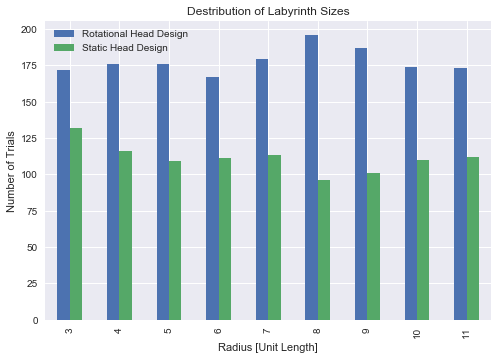

In [328]:
sr.name = 'Static Head Design'
hr.name = 'Rotational Head Design'
trails = pd.concat([hr,sr],axis=1)
plt.figure()
trails.plot(kind='bar')
plt.title("Destribution of Labyrinth Sizes")
plt.ylabel("Number of Trials")
plt.xlabel("Radius [Unit Length]")
plt.show()

In [329]:
trails.head(10)

,Rotational Head Design,Static Head Design
3,172,132
4,176,116
5,176,109
6,167,111
7,179,113
8,196,96
9,187,101
10,174,110
11,173,112


In [330]:
hfailed = hd[hd['Deadend']==True]
sfailed = sd[sd['Deadend']==True]

In [331]:
# Progress before failure
hfailed['Radial Distance'].mean()/hfailed['Radius'].mean()

0.5566510437191672

In [332]:
# Progress before failure
sfailed['Radial Distance'].mean()/sfailed['Radius'].mean()

0.43897933107476855

In [333]:
hhard = hd[hd['Radius']>8]
shard = sd[sd['Radius']>8]

In [334]:
len(hhard[hhard['Deadend']==False])/len(hhard)

0.22846441947565543

In [335]:
len(shard[shard['Deadend']==False])/len(shard)

0.1021671826625387

In [336]:
sd['Radius'].value_counts().tolist()

[132, 116, 113, 112, 111, 110, 109, 101, 96]

In [337]:
sd['Radius'].value_counts()

3     132
4     116
7     113
11    112
6     111
10    110
5     109
9     101
8      96
Name: Radius, dtype: int64

In [338]:
sd['Radius'].unique()

array([ 3,  7,  5,  8,  4,  6,  9, 10, 11])

In [339]:
sd_freq = sd['Radius'].value_counts()
hd_new = pd.DataFrame(columns=hd.columns.tolist())
for i in sd['Radius'].unique():
#     print(i,sd_freq[i])
#     print(sd_freq[i],temp)
    df = hd[hd['Radius']==i].copy()
    df.index = range(len(df.index))
    to_drop = np.arange(sd_freq[i],len(df)).tolist()
    print(len(df),len(to_drop))
    df = df.drop(df.index[to_drop])
    hd_new=pd.concat([hd_new,df],axis=0)
print(hd_new['Radius'].value_counts())

172 40
179 66
176 67
196 100
176 60
167 56
187 86
174 64
173 61
3     132
4     116
7     113
11    112
6     111
10    110
5     109
9     101
8      96
Name: Radius, dtype: int64


In [296]:
hd_new.head()

,Distance Travelled,Radial Distance,Deadend,Turned Head,Blocks,Radius,Timeout
17,5.003965,4.852556,False,0,18,3,False
20,4.782392,4.747203,False,0,18,3,False
22,2.683229,2.408419,True,6,18,3,False
23,4.960313,4.876439,False,0,18,3,False
52,1.753796,1.556167,True,10,18,3,False


In [297]:
hd_new.shape

(933, 7)

In [298]:
sd.shape

(1000, 7)

In [302]:
hd.index[3]

3

In [340]:
hr = hd_new['Radius'].value_counts(False)
sr = sradius.value_counts(False)

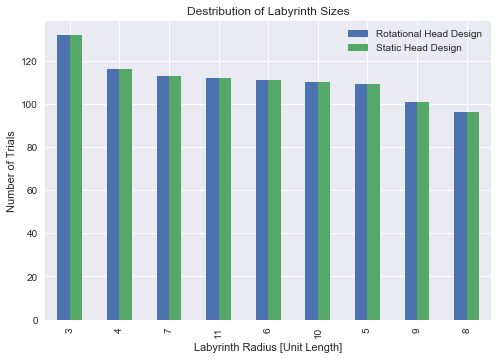

In [342]:
sr.name = 'Static Head Design'
hr.name = 'Rotational Head Design'
trails = pd.concat([hr,sr],axis=1)
plt.figure()
trails.plot(kind='bar')
plt.title("Destribution of Labyrinth Sizes")
plt.ylabel("Number of Trials")
plt.xlabel("Labyrinth Radius [Unit Length]")
plt.show()

222
222
               Escaped  Hit Deadend  Timed Out
Turning Head     0.108        0.766      0.126
Static Head      0.045        0.919      0.036


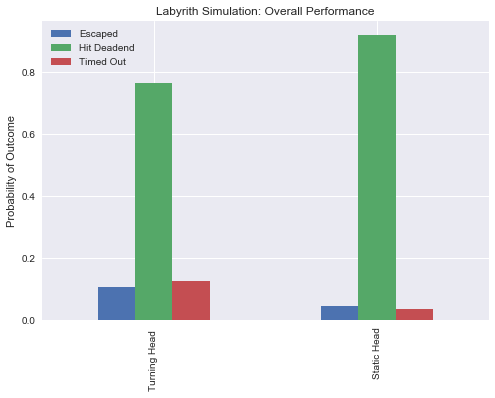

In [351]:
series =[]
index = []
for i,df in enumerate([hd_new,sd]):
    blocks = df['Blocks'][1]
    radius = df['Radius'][1]
    df = df[df['Radius'] >= 10]
    print(len(df))
#     df = df[df['Radius'] > 3]
    f = len(df[df['Deadend']==True])
    s = len(df[df['Deadend']==False])
    tot = s+f
    t_frac = round(len(df[df['Timeout']==True])/tot,3)
    s_frac = round(s/tot,3)
    f_frac = round(f/tot,3)
    series.append([s_frac-t_frac,f_frac,t_frac])
    if df['Turned Head'].mean() > 1:
        index.append('Turning Head '.format(radius,blocks))
    else:
        index.append('Static Head'.format(radius,blocks))
        
data = pd.DataFrame(series,columns=['Escaped','Hit Deadend','Timed Out'],index = index)
print(data.head())

plt.figure()
data.plot(kind='bar')
# plt.xlabel('Outcome')
plt.ylabel('Probability of Outcome')
plt.title('Labyrith Simulation: Overall Performance')

plt.show()

In [388]:
pie_data = data['Escaped'].copy()
old_sum = pie_data.sum()
for i in range(len(pie_data)):
    pie_data[i]=pie_data[i]/old_sum

# pie_data['Static Head']=pie_data['Static Head']/pie_data.sum()
# pie_data['Turning Head']=pie_data['Turning Head']/pie_data.sum()

In [391]:
pie_data.name = ""
pie_data.head()


Turning Head     0.705882
Static Head      0.294118
Name: , dtype: float64

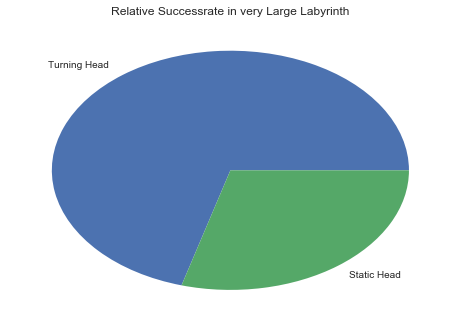

In [394]:
plt.figure()
pie_data.plot(kind='pie')
plt.title('Relative Successrate in large scale Labyrinth')
plt.show()

In [10]:
scoll.head()

,Distance Travelled,Radial Distance,Deadend,Turned Head,Blocks,Radius,Timeout,Collided
0,7.829222,7.577031,False,0,50,5,False,False
1,3.870495,3.540833,False,0,72,6,False,True
2,2.662340,2.492917,True,0,162,9,False,False
3,6.638023,6.286351,False,0,32,4,False,False
4,4.992501,4.920768,True,0,128,8,False,False


In [11]:
scoll[scoll['Collided']==True].describe()

,Distance Travelled,Radial Distance,Turned Head,Blocks,Radius
count,164.000000,164.000000,164.0,164.000000,164.000000
mean,5.430369,4.795635,0.0,137.756098,8.060976
std,2.291944,1.518182,0.0,62.845718,1.980565
min,3.042940,2.849691,0.0,32.000000,4.000000
25%,3.887097,3.730743,0.0,72.000000,6.000000
50%,4.717521,4.406329,0.0,128.000000,8.000000
75%,5.993201,5.395425,0.0,200.000000,10.000000
max,17.226528,12.033124,0.0,242.000000,11.000000


In [26]:
len(scoll[scoll['Collided']==True])/len(scoll)

0.164

In [41]:
series =[]
index = []
radii = scoll['Radius'].unique().tolist()
radii.sort()
for i in radii:
    print(i)
    scoll_s = scoll[scoll['Radius']==i]
    value = len(scoll_s[scoll_s['Collided']==True])/len(scoll_s)
    index.append(str(i))
    series.append((1-value,value))
print(index)
print(len(series))
total = len(scoll[scoll['Collided']==True])/len(scoll)
series.append((1-total,total))
index.append("Total")
scoll_data = pd.DataFrame(series,columns=['Collision Free','Collided'],index = index)
print(scoll_data.head())

3
4
5
6
7
8
9
10
11
['3', '4', '5', '6', '7', '8', '9', '10', '11']
9
   Collision Free  Collided
3        1.000000  0.000000
4        0.948276  0.051724
5        0.912000  0.088000
6        0.812030  0.187970
7        0.737374  0.262626


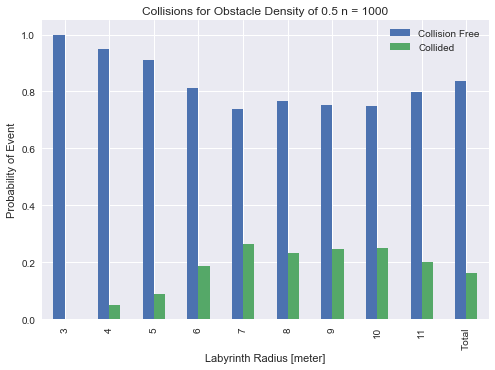

In [42]:
plt.figure()
scoll_data.plot(kind='bar')
plt.ylabel("Probability of Event")
plt.xlabel("Labyrinth Radius [meter]")
plt.title("Collisions for Obstacle Density of 0.5 n = 1000")
plt.show()

In [34]:
scoll['Radius'].unique().tolist()

[5, 6, 9, 4, 8, 3, 10, 11, 7]

In [ ]:
len(scoll[scoll['Collided']==True])/len(scoll)